In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('FinancialDataCSV - FinancialData (2).csv')
df

,Stock ID,8:00:00,8:01:00,8:02:00,8:03:00,8:04:00,8:05:00,8:06:00,8:07:00,8:08:00,...,1M - <3M Vol,3M - <5M Vol,5M - <10M Vol,10M - 20M Vol,>20M Vol,IsTuesday,IsWednesday,IsThursday,IsFriday,ActualOutcome
0,0,1.483636,1.501818,1.483091,1.490364,1.487273,1.505455,1.505455,1.505673,1.530909,...,1,0,0,0,0,1,0,0,0,0
1,1,1.300000,1.316000,1.312000,1.304000,1.296000,1.296000,1.304000,1.304000,1.304000,...,1,0,0,0,0,0,0,0,1,0
2,2,1.016249,1.016249,1.016249,1.016249,1.016249,1.016249,1.016249,1.016249,1.016249,...,0,0,0,0,0,0,0,0,0,1
3,3,1.168163,1.026939,1.144490,1.167347,1.167347,1.142857,1.167347,1.182857,1.182857,...,0,0,1,0,0,0,0,1,0,0
4,4,1.834043,1.825532,1.814894,1.812766,1.808511,1.810638,1.840426,1.834043,1.793617,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,2543,1.102724,1.101946,1.050584,1.102724,1.070039,1.105058,1.104280,1.105058,1.128405,...,0,0,1,0,0,0,1,0,0,1
2544,2544,1.036496,1.080292,1.026764,1.026764,1.026764,1.000000,1.000000,1.216545,1.618005,...,0,0,0,1,0,0,1,0,0,0
2545,2545,1.228387,1.224516,1.227097,1.201290,1.200000,1.223226,1.219355,1.183226,1.190968,...,0,1,0,0,0,0,0,1,0,0
2546,2546,1.312217,1.312217,1.248869,1.226244,1.206637,1.220211,1.259427,1.279035,1.306184,...,0,0,0,0,1,0,0,0,0,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Columns: 115 entries, Stock ID to ActualOutcome
dtypes: float64(90), int64(25)
memory usage: 2.2 MB
None


In [4]:
from scipy import stats

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Calculate Z-scores for each data point in the numerical columns
z_scores = stats.zscore(df[numerical_cols])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Check if any Z-score exceeds the threshold in any numerical column
outliers_exist = (z_scores > threshold).any().any()

if outliers_exist:
    print("Outliers exist in the dataset.")
else:
    print("No outliers found in the dataset.")

Outliers exist in the dataset.


In [5]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Outlier detection for numerical columns using Z-score
z_scores = stats.zscore(df[numerical_cols])
outliers_numerical = (z_scores > 3) | (z_scores < -3)
outliers_numerical = pd.DataFrame(outliers_numerical, columns=numerical_cols)

# Outlier detection for categorical columns based on frequency
outliers_categorical = pd.DataFrame()
for col in categorical_cols:
    counts = df[col].value_counts()
    outliers_categorical[col] = df[col].isin(counts[counts < 10].index)

# Combine outliers from numerical and categorical columns
outliers_combined = pd.concat([outliers_numerical, outliers_categorical], axis=1).any(axis=1)

# Remove outliers from the dataset
df = df[~outliers_combined]

# Display or save the cleaned dataset
print(df)

      Stock ID   8:00:00   8:01:00   8:02:00   8:03:00   8:04:00   8:05:00  \
1            1  1.300000  1.316000  1.312000  1.304000  1.296000  1.296000   
3            3  1.168163  1.026939  1.144490  1.167347  1.167347  1.142857   
7            7  1.112903  1.112903  1.112903  1.112903  1.112903  1.112903   
10          10  1.101562  1.109375  1.109375  1.234375  1.210938  1.273438   
11          11  1.000000  0.976331  0.976331  0.977988  1.005917  1.017751   
...        ...       ...       ...       ...       ...       ...       ...   
2541      2541  1.548333  1.466667  1.479583  1.444583  1.444583  1.368333   
2542      2542  1.436127  1.436127  1.522376  1.501221  1.505289  1.505289   
2543      2543  1.102724  1.101946  1.050584  1.102724  1.070039  1.105058   
2544      2544  1.036496  1.080292  1.026764  1.026764  1.026764  1.000000   
2547      2547  3.981711  3.628319  3.746313  4.041298  4.070796  4.719764   

       8:06:00   8:07:00   8:08:00  ...  1M - <3M Vol  3M - <5M

In [6]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display columns with null values and their counts
columns_with_null = null_values[null_values > 0]
print("Columns with Null Values:")
print(columns_with_null)

# Display a summary of null values
print("\nSummary of Null Values:")
print(df.isnull().sum().sum())

Columns with Null Values:
Series([], dtype: int64)

Summary of Null Values:
0


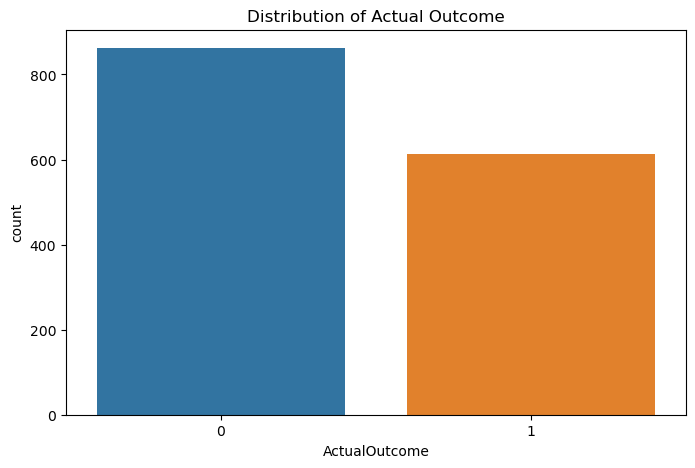

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='ActualOutcome', data=df)
plt.title('Distribution of Actual Outcome')
plt.show()

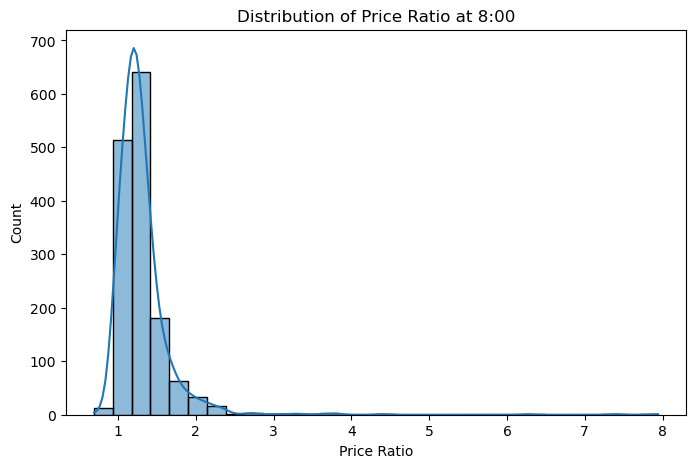

In [9]:
# Visualize the distribution of a specific feature
plt.figure(figsize=(8, 5))
sns.histplot(df['8:01:00'], bins=30, kde=True)
plt.title('Distribution of Price Ratio at 8:00')
plt.xlabel('Price Ratio')
plt.show()

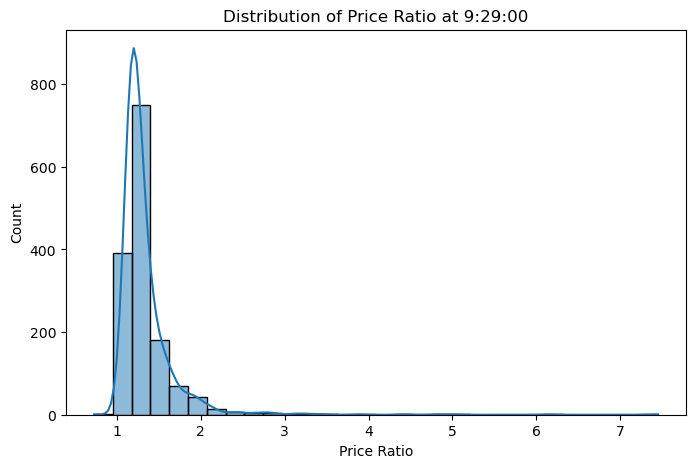

In [10]:
# Visualize the distribution of a specific feature
plt.figure(figsize=(8, 5))
sns.histplot(df['9:29:00'], bins=30, kde=True)
plt.title('Distribution of Price Ratio at 9:29:00')
plt.xlabel('Price Ratio')
plt.show()

In [11]:
# Assuming 'outcome' is your target variable
X = df.drop('ActualOutcome', axis=1)
y = df['ActualOutcome']

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from xgboost import XGBClassifier

# Model training
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
model.score(X_train_scaled, y_train)

1.0

In [18]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1])

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.559322033898305
Confusion Matrix:
[[122  52]
 [ 78  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       174
           1       0.45      0.36      0.40       121

    accuracy                           0.56       295
   macro avg       0.53      0.53      0.53       295
weighted avg       0.55      0.56      0.55       295



In [20]:
model0 = DecisionTreeClassifier()
model0.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [21]:
model0.score(X_train_scaled, y_train)

1.0

In [22]:
# Model evaluation
y_pred0 = model0.predict(X_test_scaled)
y_pred0

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
from sklearn.svm import SVC

model1 = SVC()
model1.fit(X_train_scaled, y_train)

SVC()

In [24]:
model1.score(X_train_scaled, y_train)

0.6276505513146734

In [25]:
# Model evaluation
y_pred1 = model1.predict(X_test_scaled)
y_pred1

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.decomposition import PCA

# Specify the number of principal components you want to retain
n_components = 40  # Adjust as needed

# Initialize the PCA transformer
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
df_pca = pd.DataFrame(pca.fit_transform(X_train_scaled), columns=[f'PC{i+1}' for i in range(n_components)])


In [27]:
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Principal Component:", explained_variance_ratio)

# Access the transformed data (principal components)
transformed_data = df_pca
print("Transformed Data (Principal Components):")
print(transformed_data)

Explained Variance Ratio for Each Principal Component: [7.75048401e-01 3.64041444e-02 1.67529023e-02 1.55888183e-02
 1.31188789e-02 1.25374758e-02 1.19708835e-02 1.18824928e-02
 1.15031001e-02 1.12910696e-02 1.09085227e-02 1.06783168e-02
 9.85419716e-03 9.42197748e-03 8.88028654e-03 8.12086288e-03
 4.57108670e-03 3.44505549e-03 2.81147256e-03 2.35335844e-03
 1.92565904e-03 1.75264850e-03 1.30160873e-03 7.71762842e-04
 6.66489004e-04 5.83070820e-04 4.94638132e-04 3.91730321e-04
 3.64538142e-04 3.47973885e-04 2.91977014e-04 2.32375003e-04
 2.12274342e-04 1.92830629e-04 1.71622274e-04 1.63300629e-04
 1.38816202e-04 1.32912477e-04 1.21665911e-04 1.18045793e-04]
Transformed Data (Principal Components):
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.186856 -0.757839 -0.868991  1.497570 -0.448764  0.916113  0.939455   
1      4.591460 -0.162660 -1.584235 -2.573551  0.381438  0.208383 -1.435127   
2     -0.811095 -0.497381 -2.094553 -1.290465  1.335411 